# CAPSTONE PROJECT

## Connect Colab to GDrive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## IMPORT PACKAGES

In [3]:
import os
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

In [4]:
path_data = "/content/gdrive/MyDrive/DatabaseColab/"
os.listdir(path_data)

['transportation_sales.db',
 'narasio_class.db',
 'rexon_metals.db',
 'weather_stations.db',
 'titanic2.csv',
 'iris.csv',
 'avocado.csv',
 'geolocation.csv',
 'titanic.csv',
 'ride_sharing_new.csv',
 'New York Bus Rides.db']

## Connect SQLite to Python

In [5]:
conn = sqlite3.connect(path_data + 'New York Bus Rides.db')
cur = conn.cursor()

## Data Preparation Using SQL

In [5]:
df = pd.read_sql_query('''SELECT bookings.booking_id, searches.user_id, segments.new_segment_tag, segments.yr_wk, searches.search_city FROM bookings
                      JOIN searches ON bookings.search_session_id = searches.session_id
                      JOIN segments ON searches.user_id = segments.user_id GROUP BY searches.user_id''', conn)
df.head()

,booking_id,user_id,new_segment_tag,yr_wk,search_city
0,5dc13a7384be79001a617e41,590f60541c36e1000159ca0d,New,2019-45,New York
1,5decf45c0c017f001a1b1578,596e45aa4380470010df5d74,Retained,2020-12,New York
2,5dc451597e3985001ab9ec56,597dcfec655e17001034d15a,Inactive,2020-04,New York
3,5dd953c1fee537001bfa7551,59926bbf5699bd0010f80559,Retained,2020-11,New York
4,5e6672be5be323001ae46692,5999613da95fcd001097827e,Retained,2020-11,New York


## PROBLEM STATEMENT

In [ ]:
# 1. Berapa customer yang sudah berhenti berlanggangan
# 2. Rute mana yang populer?
# 3. Kapan orang paling sering memesan bis?
# 4. Apa OS yang paling banyak digunakan pengguna?

## DATA CLEANSING

In [6]:
# Mencari Missing Data

pd.isnull(df).sum()

booking_id         0
user_id            0
new_segment_tag    0
yr_wk              0
search_city        0
dtype: int64

In [7]:
# Mencari Data Duplicate

df[df["user_id"].duplicated(keep=False)].sort_values("user_id")

,booking_id,user_id,new_segment_tag,yr_wk,search_city


In [8]:
df[df["booking_id"].duplicated(keep=False)].sort_values("booking_id")

,booking_id,user_id,new_segment_tag,yr_wk,search_city


In [9]:
#Hapus Data Duplicate

df = df.drop_duplicates(subset=['user_id']).reset_index()

In [10]:
df.head(10)

,index,booking_id,user_id,new_segment_tag,yr_wk,search_city
0,0,5dc13a7384be79001a617e41,590f60541c36e1000159ca0d,New,2019-45,New York
1,1,5decf45c0c017f001a1b1578,596e45aa4380470010df5d74,Retained,2020-12,New York
2,2,5dc451597e3985001ab9ec56,597dcfec655e17001034d15a,Inactive,2020-04,New York
3,3,5dd953c1fee537001bfa7551,59926bbf5699bd0010f80559,Retained,2020-11,New York
4,4,5e6672be5be323001ae46692,5999613da95fcd001097827e,Retained,2020-11,New York
5,5,5e0a4cf6dd0a2b001a3e0b41,59ce3cc92c0ffc0010437eb0,Retained,2020-12,New York
6,6,5e357829599a53001a403376,59dc81d397b66b000fa5e45b,Inactive,2020-12,New York
7,7,5e5699e7f8eb76001aef9527,59dcf3ed97b66b000fa62f0b,Retained,2020-12,New York
8,8,5e60ef135aa572001a8a0145,59dd1c60350a2e000fa82ee5,Retained,2020-11,New York
9,9,5e552e3c25d4a3001a5d5821,59dd63758f279c000f6e00e3,Retained,2020-11,New York


## EXPLORATORY DATA

In [11]:
# Mengetahui Tipe Data

df.dtypes

index               int64
booking_id         object
user_id            object
new_segment_tag    object
yr_wk              object
search_city        object
dtype: object

In [54]:
#1. Berapa customer yang sudah berhenti berlangganan?

jumlah_pelanggan = df['new_segment_tag'].value_counts()
jumlah_pelanggan

#Terdapat 169 pelanggan yang berhenti berlangganan

Retained    1825
Inactive     169
New           51
Explorer       9
Name: new_segment_tag, dtype: int64

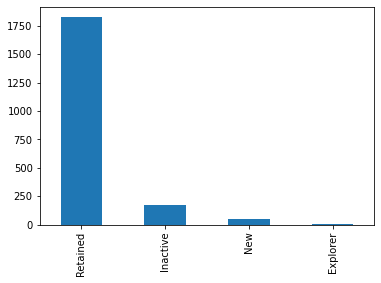

In [40]:
jumlah_pelanggan.plot.bar()

In [35]:
#2. Rute mana yang paling populer?

df['search_city'].value_counts()
df.to_csv('main_df.csv')

In [22]:
#3. Kapan orang paling sering memesan bis?

df_cust = pd.read_sql_query('''SELECT DISTINCT searches.user_id, segments.yr_wk 
                              FROM searches JOIN segments ON searches.user_id = segments.user_id''', conn)
df_cust['yr_wk'] = df_cust['yr_wk'].astype(str)
df_cust['yr_wk'] = df_cust['yr_wk'].str.slice(0,4)

In [34]:
df_cust['yr_wk'] = df_cust['yr_wk'].astype(int)
df_cust.to_csv('df_cust.csv')

In [33]:
jumlah = df_cust.groupby('yr_wk').count()
jumlah.to_csv('jumlah.csv')

In [53]:
jumlah

,user_id
yr_wk,
2019,96018
2020,45439


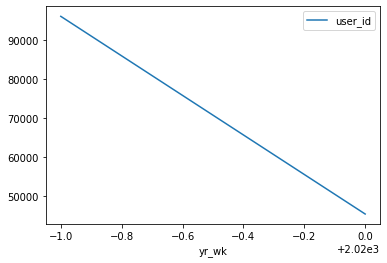

In [31]:
jumlah.plot.line()

In [6]:
jumlah_os = pd.read_sql_query("SELECT user_device_os, user_device_app_version FROM searches", conn)
value_os = jumlah_os.value_counts()

In [52]:
value_os.groupby

<bound method Series.groupby of user_device_os  user_device_app_version
android         286.0                      1247
                291.0                      1175
                284.0                       549
                277.0                       478
ios             3390.0                      408
                                           ... 
                3152.0                        1
                3161.0                        1
                3184.0                        1
                3171.0                        1
android         46.0                          1
Length: 75, dtype: int64>

In [7]:
jumlah_os.to_csv('jumlah_os.csv')

## REKOMENDASI

- Dapat dilakukan program terhadap pelanggan yang sudah lama tidak aktif seperti voucher untuk pelanggan yang sudah lama tidak aktif (return back program)
- Untuk pelanggan baru dapat ditingkatkan loyalitasnya
- Pelanggan yang sudah lama retained dan sering repeat order dapat diberikan poin untuk loyaltynya
- Terjadi penurunan pelanggan pada tahun 2020, harus ditentukan apa penyebabnya, apakah karena pandemi, dsb
- Pelanggan tipe eksplorer bisa ditingkatkan menjadi new dengan cara mempermudah untuk memulai pemesanan
- Pengguna android lebih banyak dari pengguna iOS, dapat meningkatkan performa aplikasi android untuk kenyamanan pengguna

## KESIMPULAN - Create the story

Di kota New York, terdapat aplikasi untuk memesan bis secara online, pada tahun 2019 terdapat 96018 pemesanan sedangkan pada tahun 2020 terdapat 45439 pemesanan, rute paling populer adalah sekitar New York, terdapat 1825 pelanggan tetap yang melakukan pemesanan ulang dalam jangka waktu 4 minggu terakhir. Pengguna aplikasi dengan OS Android lebih banyak dibandingkan pengguna IOS, aplikasi android harus lebih ringan dan mudah untuk digunakan.